In [ ]:
import numpy as np

class ScratchLinearRegression:
    """
    A simple implementation of a multiple linear regression model from scratch.

    This class uses the normal equation to find the optimal coefficients
    for the linear regression model. It does not use any external machine
    learning libraries.

    Attributes:
        coefficients (ndarray): The coefficients (weights) of the linear model,
                                 including the intercept term.
    """
    def __init__(self):
        """Initializes the ScratchLinearRegression model."""
        self.coefficients = None

    def fit(self, X, y):
        """
        Fits the linear regression model to the training data.

        Args:
            X (ndarray): The training input samples. This is a 2D array where
                         each row is a sample and each column is a feature.
            y (ndarray): The target values. This is a 1D array of target
                         values corresponding to the input samples.
        """
        # Add a bias term (intercept) to the input features.
        # This is done by adding a column of ones to the beginning of the X matrix.
        X_b = np.c_[np.ones((X.shape[0], 1)), X]

        # Calculate the coefficients using the normal equation:
        # coefficients = (X_b^T * X_b)^-1 * X_b^T * y
        try:
            # np.linalg.inv computes the inverse of a matrix.
            # X_b.T computes the transpose of the X_b matrix.
            # @ is the matrix multiplication operator.
            self.coefficients = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
        except np.linalg.LinAlgError:
            # Handle cases where the matrix is singular and cannot be inverted.
            # This can happen if there is perfect multicollinearity in the data.
            print("Error: The matrix is singular and cannot be inverted. "
                  "This may be due to multicollinearity in your data.")
            self.coefficients = None

    def predict(self, X):
        """
        Makes predictions using the fitted linear regression model.

        Args:
            X (ndarray): The input samples for which to make predictions.

        Returns:
            ndarray: The predicted values.
        """
        if self.coefficients is None:
            raise Exception("The model has not been fitted yet. "
                            "Please call the 'fit' method before making predictions.")

        # Add a bias term to the input features.
        X_b = np.c_[np.ones((X.shape[0], 1)), X]

        # Make predictions using the calculated coefficients.
        # The prediction is the dot product of the input features (with bias)
        # and the coefficients.
        predictions = X_b @ self.coefficients
        return predictions

In [6]:
from google.colab import files

# Open file upload dialog
uploaded = files.upload()

# If CSV file:
import pandas as pd
data  = pd.read_csv(list(uploaded.keys())[0])
data.head()

Saving advertising.csv to advertising (2).csv


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [7]:
import numpy as np

class ScratchLinearRegression:
    """
    A simple implementation of a multiple linear regression model from scratch.

    This class uses the normal equation to find the optimal coefficients
    for the linear regression model. It does not use any external machine
    learning libraries for the core regression algorithm.

    Attributes:
        coefficients (ndarray): The coefficients (weights) of the linear model,
                                 with the intercept term at the beginning.
    """
    def __init__(self):
        """Initializes the ScratchLinearRegression model."""
        self.coefficients = None

    def fit(self, X, y):
        """
        Fits the linear regression model to the training data.

        The method calculates the optimal model parameters using the
        analytical solution provided by the normal equation.

        Args:
            X (ndarray): The training input samples. This should be a 2D array
                         where each row represents a sample and each column
                         represents a feature.
            y (ndarray): The target values. This should be a 1D array of target
                         values corresponding to the input samples.
        """
        # Add a bias term (intercept) to the input features.
        # This is done by adding a column of ones to the beginning of the X matrix.
        X_b = np.c_[np.ones((X.shape[0], 1)), X]

        # Calculate the coefficients using the normal equation:
        # coefficients = (X_b^T * X_b)^-1 * X_b^T * y
        try:
            # np.linalg.inv computes the inverse of a matrix.
            # X_b.T computes the transpose of the X_b matrix.
            # @ is the matrix multiplication operator in NumPy.
            self.coefficients = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
        except np.linalg.LinAlgError:
            # Handle cases where the matrix is singular and cannot be inverted.
            print("Error: The matrix is singular and cannot be inverted. "
                  "This may be due to multicollinearity in your data.")
            self.coefficients = None

    def predict(self, X):
        """
        Makes predictions using the fitted linear regression model.

        Args:
            X (ndarray): The input samples for which to make predictions.

        Returns:
            ndarray: An array of the predicted values.
        """
        if self.coefficients is None:
            raise Exception("The model has not been fitted yet. "
                            "Please call the 'fit' method before making predictions.")

        # Add a bias term to the input features, just as we did for training.
        X_b = np.c_[np.ones((X.shape[0], 1)), X]

        # Make predictions using the dot product of the input features and coefficients.
        predictions = X_b @ self.coefficients
        return predictions

First 5 rows of the dataset:
      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9

Model Accuracy (R-squared score): 0.8656

--- Model Coefficients (from scratch) ---
Intercept: 0.1092
           Coefficient
TV            0.626664
Radio         0.214827
Newspaper     0.028156


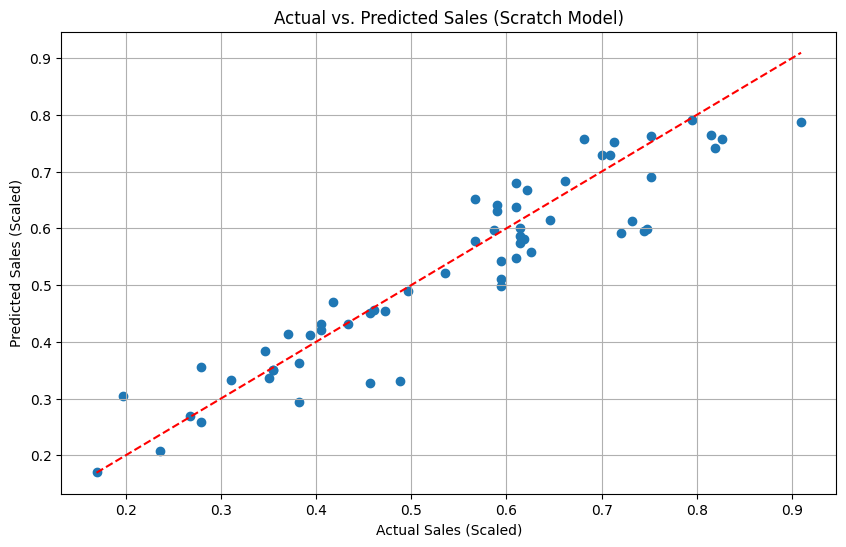

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler



print("First 5 rows of the dataset:")
print(data.head())

# --- 2. Scale and Split the Data ---
# Note: Unlike the housing data, this dataset is all numerical, so no encoding is needed.

# Initialize the scaler
scaler = MinMaxScaler()

# Apply the scaler to all columns
data_scaled = scaler.fit_transform(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)

# Define features (X) and target (y)
X = data_scaled[['TV', 'Radio', 'Newspaper']]
y = data_scaled['Sales']

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

# Convert pandas DataFrames to NumPy arrays for our scratch model
X_train_np = X_train.values
y_train_np = y_train.values
X_test_np = X_test.values
y_test_np = y_test.values


# --- 3. ScratchLinearRegression Class Definition (pasted again for a self-contained cell) ---
class ScratchLinearRegression:
    def __init__(self):
        self.coefficients = None

    def fit(self, X, y):
        X_b = np.c_[np.ones((X.shape[0], 1)), X]
        try:
            self.coefficients = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
        except np.linalg.LinAlgError:
            print("Error: The matrix is singular and cannot be inverted.")
            self.coefficients = None

    def predict(self, X):
        if self.coefficients is None:
            raise Exception("Model has not been fitted yet.")
        X_b = np.c_[np.ones((X.shape[0], 1)), X]
        return X_b @ self.coefficients


# --- 4. Train, Predict, and Evaluate ---
# Create an instance of the model
scratch_model = ScratchLinearRegression()

# Fit the model
scratch_model.fit(X_train_np, y_train_np)

# Make predictions
y_pred = scratch_model.predict(X_test_np)

# R-squared function from scratch
def r2_score_scratch(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred)**2)
    ss_tot = np.sum((y_true - np.mean(y_true))**2)
    return 1 - (ss_res / ss_tot)

r2 = r2_score_scratch(y_test_np, y_pred)
print(f"\nModel Accuracy (R-squared score): {r2:.4f}\n")

# Display the coefficients
intercept = scratch_model.coefficients[0]
feature_coeffs = scratch_model.coefficients[1:]
coefficients_df = pd.DataFrame(feature_coeffs, X_train.columns, columns=['Coefficient'])
print("--- Model Coefficients (from scratch) ---")
print(f"Intercept: {intercept:.4f}")
print(coefficients_df)

# --- 5. Visualize the Results ---
plt.figure(figsize=(10, 6))
plt.scatter(y_test_np, y_pred)
plt.xlabel("Actual Sales (Scaled)")
plt.ylabel("Predicted Sales (Scaled)")
plt.title("Actual vs. Predicted Sales (Scratch Model)")
plt.plot([min(y_test_np), max(y_test_np)], [min(y_test_np), max(y_test_np)], color='red', linestyle='--')
plt.grid(True)
plt.show()